<a href="https://colab.research.google.com/github/derrodo61/notebooks/blob/main/diffusers_UNet2DModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install diffusers

In [2]:
from diffusers import UNet2DModel
import torch

In [3]:
repo_id = "google/ddpm-cat-256"
model = UNet2DModel.from_pretrained(repo_id, use_safetensors=True)

In [4]:
model.config

FrozenDict([('sample_size', 256),
            ('in_channels', 3),
            ('out_channels', 3),
            ('center_input_sample', False),
            ('time_embedding_type', 'positional'),
            ('freq_shift', 1),
            ('flip_sin_to_cos', False),
            ('down_block_types',
             ['DownBlock2D',
              'DownBlock2D',
              'DownBlock2D',
              'DownBlock2D',
              'AttnDownBlock2D',
              'DownBlock2D']),
            ('up_block_types',
             ['UpBlock2D',
              'AttnUpBlock2D',
              'UpBlock2D',
              'UpBlock2D',
              'UpBlock2D',
              'UpBlock2D']),
            ('block_out_channels', [128, 128, 256, 256, 512, 512]),
            ('layers_per_block', 2),
            ('mid_block_scale_factor', 1),
            ('downsample_padding', 0),
            ('downsample_type', 'conv'),
            ('upsample_type', 'conv'),
            ('dropout', 0.0),
            ('act_fn', 'si

In [5]:
torch.manual_seed(0)

noisy_sample = torch.randn(1, model.config.in_channels, model.config.sample_size, model.config.sample_size)
noisy_sample.shape
torch.Size([1, 3, 256, 256])

torch.Size([1, 3, 256, 256])

In [6]:
with torch.no_grad():
  noisy_residual = model(sample=noisy_sample, timestep=2).sample

In [7]:
from diffusers import DDPMScheduler
scheduler = DDPMScheduler.from_pretrained(repo_id)
scheduler

DDPMScheduler {
  "_class_name": "DDPMScheduler",
  "_diffusers_version": "0.29.2",
  "beta_end": 0.02,
  "beta_schedule": "linear",
  "beta_start": 0.0001,
  "clip_sample": true,
  "clip_sample_range": 1.0,
  "dynamic_thresholding_ratio": 0.995,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "rescale_betas_zero_snr": false,
  "sample_max_value": 1.0,
  "steps_offset": 0,
  "thresholding": false,
  "timestep_spacing": "leading",
  "trained_betas": null,
  "variance_type": "fixed_small"
}

In [8]:
#less_noisy_sample = scheduler.step(model_output=noisy_residual, timestep=2, sample=noisy_sample).prev_sample
#less_noisy_sample.shape

In [9]:
import PIL.Image
import numpy as np

In [10]:
def display_sample(sample, i):
    image_processed = sample.cpu().permute(0, 2, 3, 1)
    image_processed = (image_processed + 1.0) * 127.5
    image_processed = image_processed.numpy().astype(np.uint8)

    image_pil = PIL.Image.fromarray(image_processed[0])
    display(f"Image at step {i}")
    display(image_pil)

In [11]:
model.to("cuda")
noisy_sample = noisy_sample.to("cuda")

  5%|▍         | 49/1000 [00:03<00:49, 19.35it/s]

'Image at step 50'

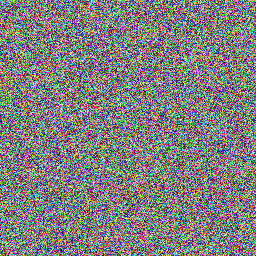

 10%|▉         | 98/1000 [00:05<00:47, 19.15it/s]

'Image at step 100'

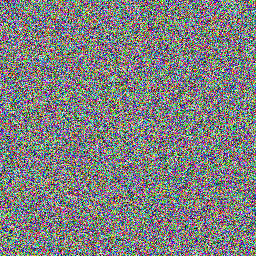

 15%|█▍        | 149/1000 [00:08<00:44, 19.15it/s]

'Image at step 150'

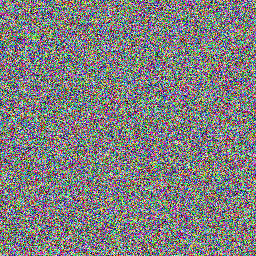

 20%|█▉        | 198/1000 [00:10<00:41, 19.13it/s]

'Image at step 200'

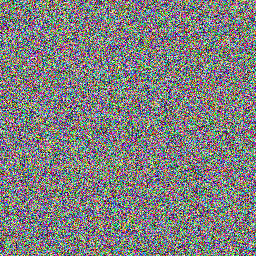

 25%|██▍       | 249/1000 [00:13<00:39, 19.14it/s]

'Image at step 250'

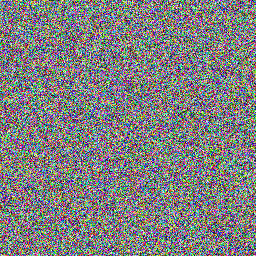

 30%|██▉       | 298/1000 [00:16<00:36, 18.97it/s]

'Image at step 300'

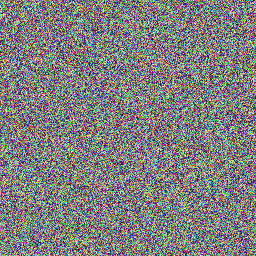

 35%|███▍      | 349/1000 [00:18<00:34, 19.02it/s]

'Image at step 350'

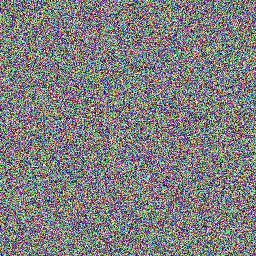

 40%|███▉      | 398/1000 [00:21<00:31, 18.89it/s]

'Image at step 400'

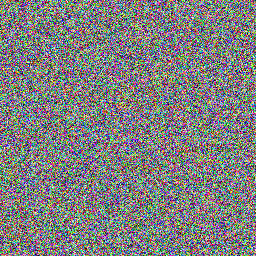

 45%|████▍     | 449/1000 [00:24<00:29, 18.91it/s]

'Image at step 450'

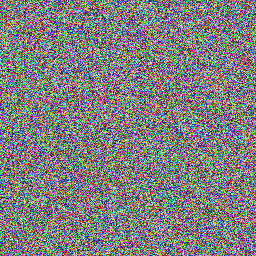

 50%|████▉     | 499/1000 [00:26<00:26, 19.10it/s]

'Image at step 500'

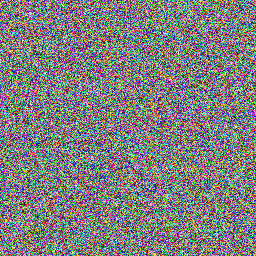

 55%|█████▍    | 548/1000 [00:29<00:23, 19.08it/s]

'Image at step 550'

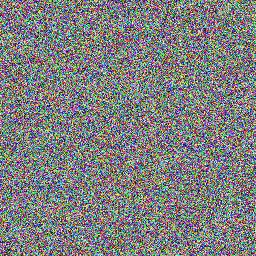

 60%|█████▉    | 599/1000 [00:32<00:20, 19.21it/s]

'Image at step 600'

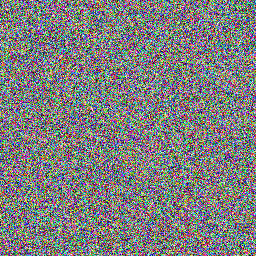

 65%|██████▍   | 648/1000 [00:34<00:18, 19.20it/s]

'Image at step 650'

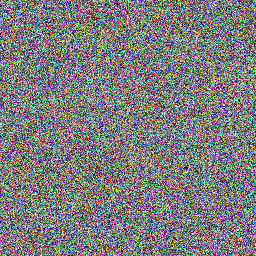

 70%|██████▉   | 699/1000 [00:37<00:15, 19.16it/s]

'Image at step 700'

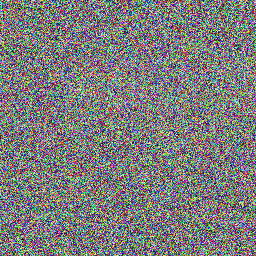

 75%|███████▍  | 748/1000 [00:39<00:13, 19.26it/s]

'Image at step 750'

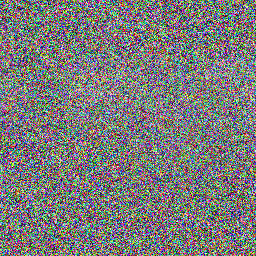

 80%|███████▉  | 799/1000 [00:42<00:10, 19.28it/s]

'Image at step 800'

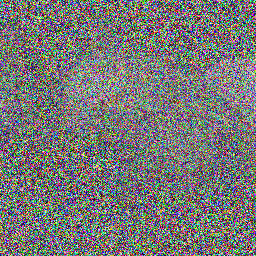

 85%|████████▍ | 848/1000 [00:45<00:07, 19.30it/s]

'Image at step 850'

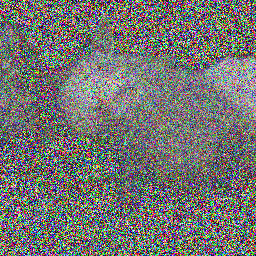

 90%|████████▉ | 898/1000 [00:47<00:05, 19.43it/s]

'Image at step 900'

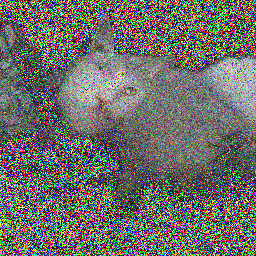

 95%|█████████▍| 949/1000 [00:50<00:02, 19.41it/s]

'Image at step 950'

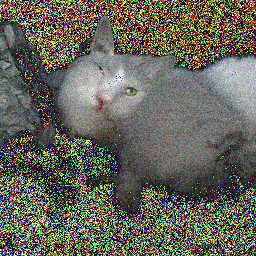

100%|█████████▉| 998/1000 [00:53<00:00, 19.45it/s]

'Image at step 1000'

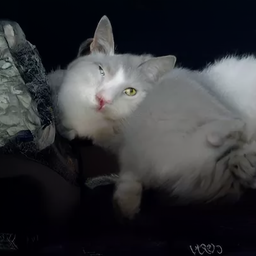

100%|██████████| 1000/1000 [00:53<00:00, 18.80it/s]


In [12]:
import tqdm

sample = noisy_sample

for i, t in enumerate(tqdm.tqdm(scheduler.timesteps)):
    # 1. predict noise residual
    with torch.no_grad():
        residual = model(sample, t).sample

    # 2. compute less noisy image and set x_t -> x_t-1
    sample = scheduler.step(residual, t, sample).prev_sample

    # 3. optionally look at image
    if (i + 1) % 50 == 0:
        display_sample(sample, i + 1)